In [56]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

path = r'/home/hakanergin/code/apriltag_test_bench/test_pipeline/scripts/static_tests/rotations/result/csv'
all_files = glob.glob(path + "/*.csv")

df_groupby_res = {"360": {}, "720": {}, "1080": {}}

for filename in all_files:
    dist, tag, res  = filename.split('_')[-3:]
    res = res.split('.')[0]
    tag = tag.split('/')[-1]
    dist = dist.split('/')[-1]

    df = pd.read_csv(filename)
    df = df[['error', 'true_yaw']]

    dic = {tag: df}
    if not dist in df_groupby_res[res]:
        df_groupby_res[res][dist] = {}
    df_groupby_res[res][dist].update(dic)



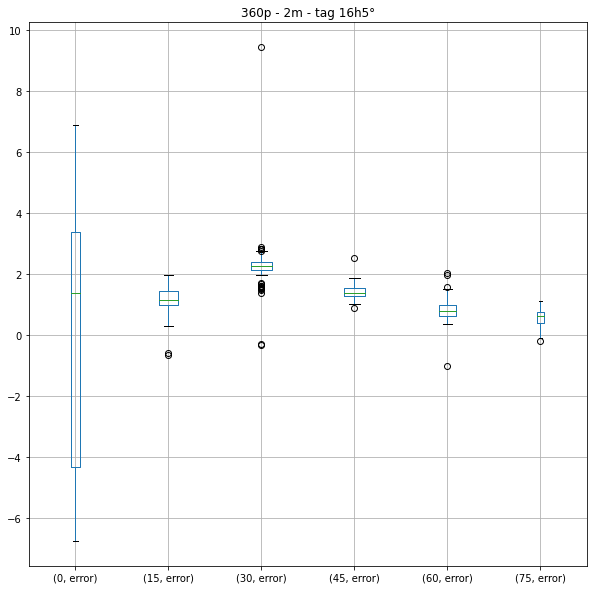

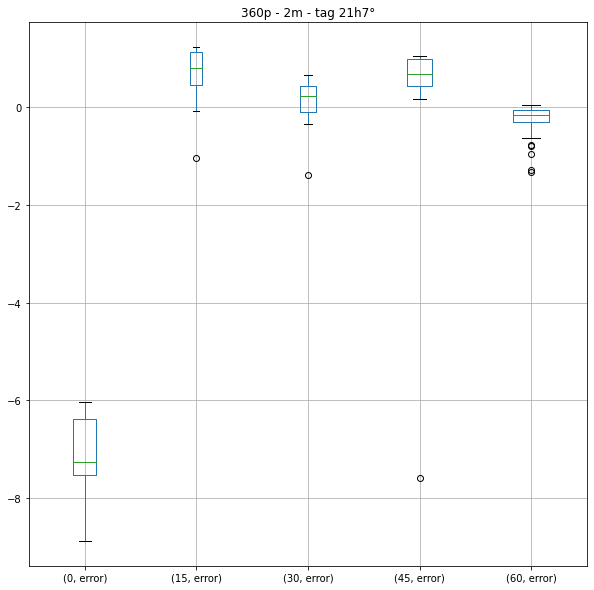

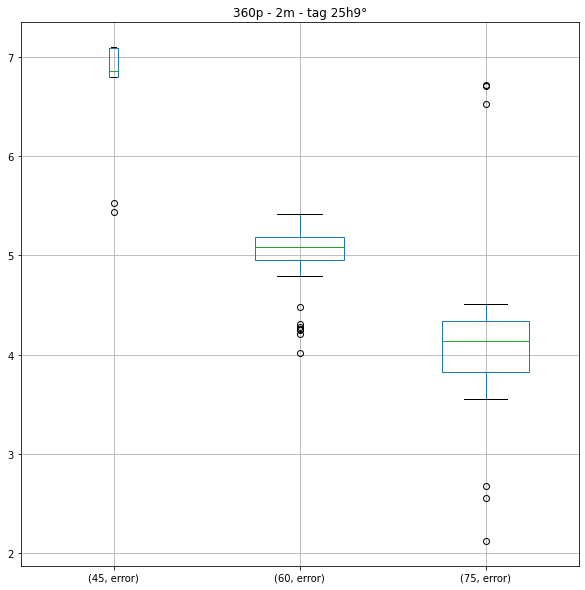

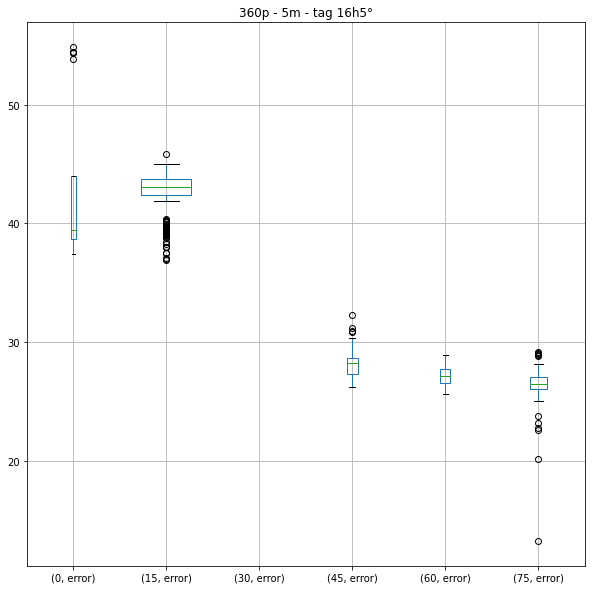

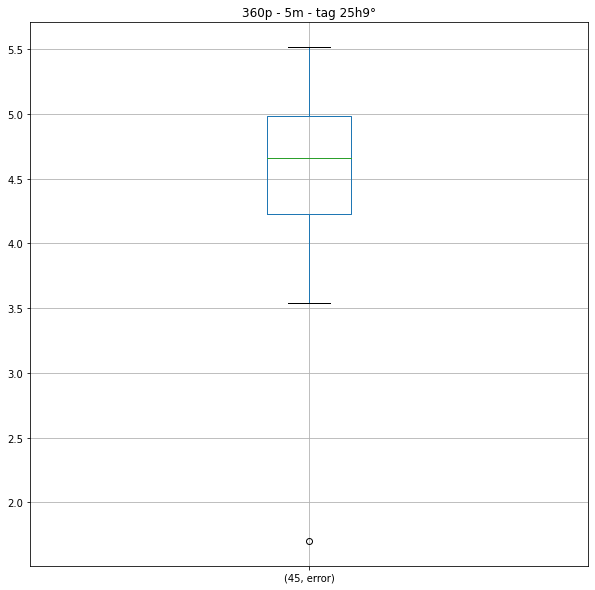

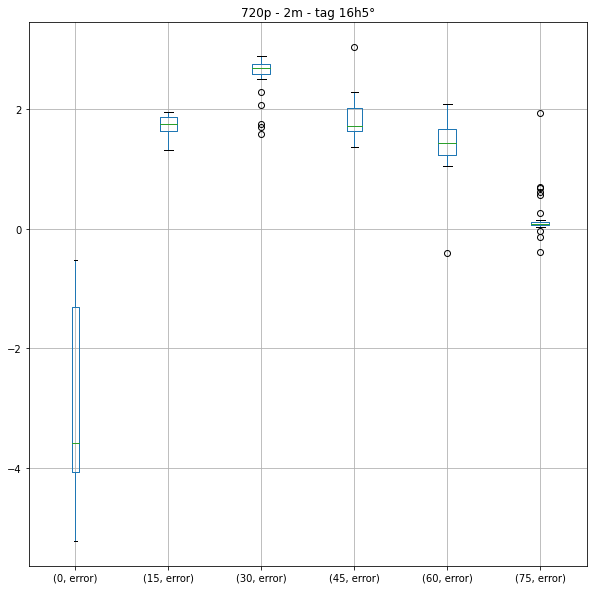

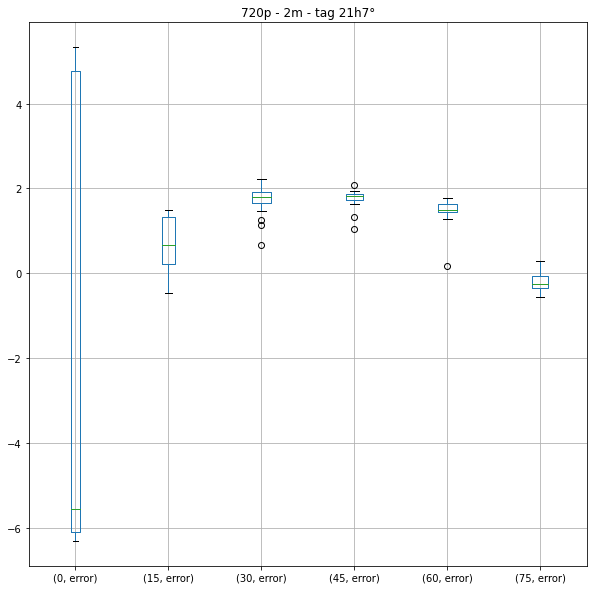

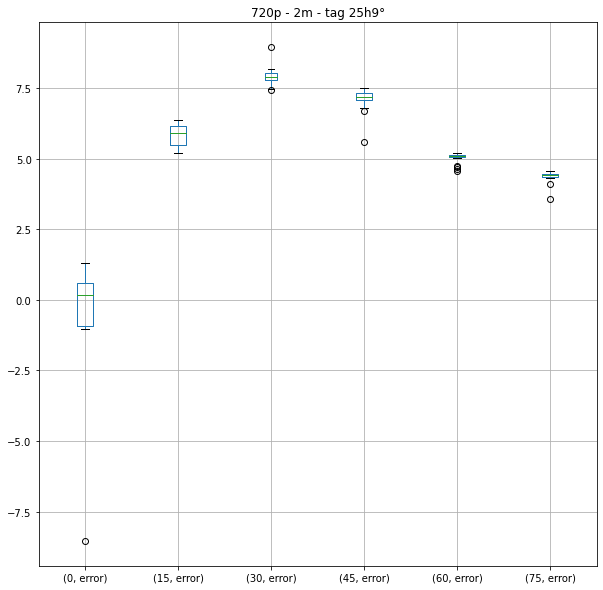

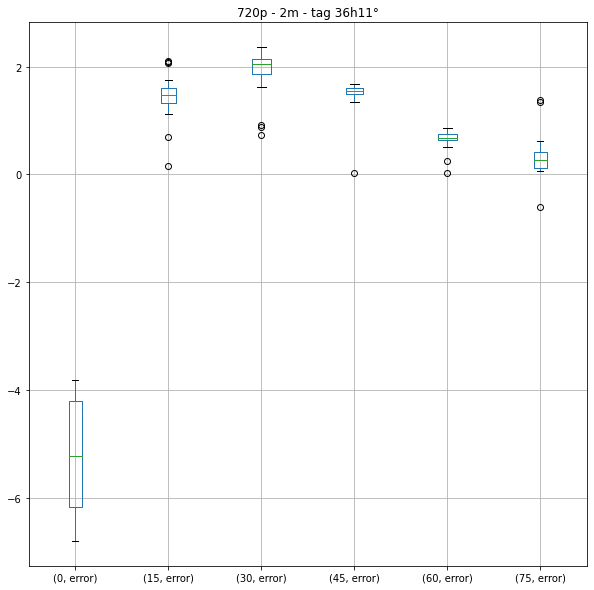

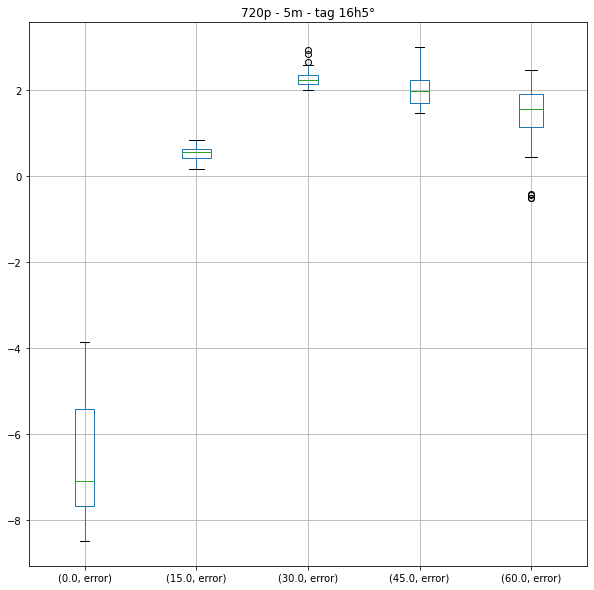

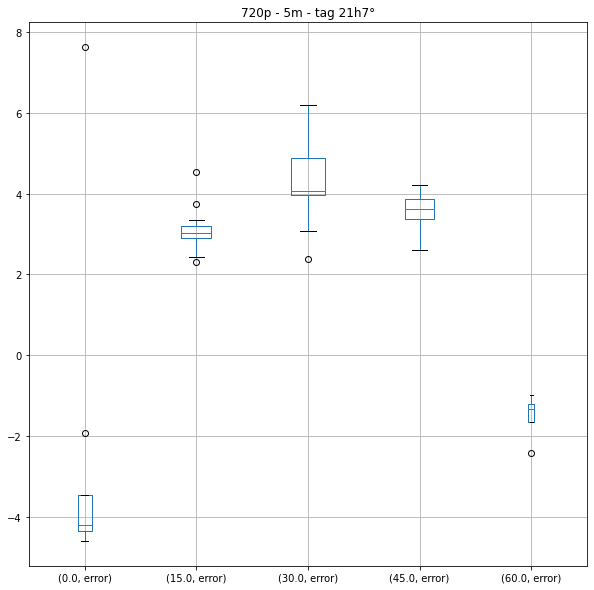

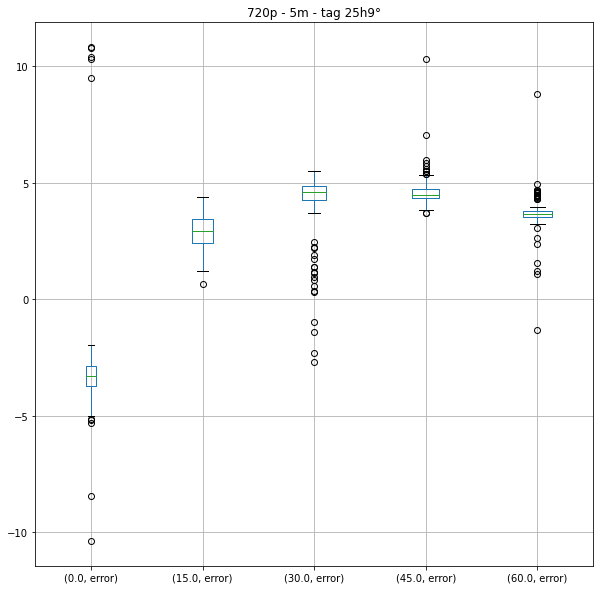

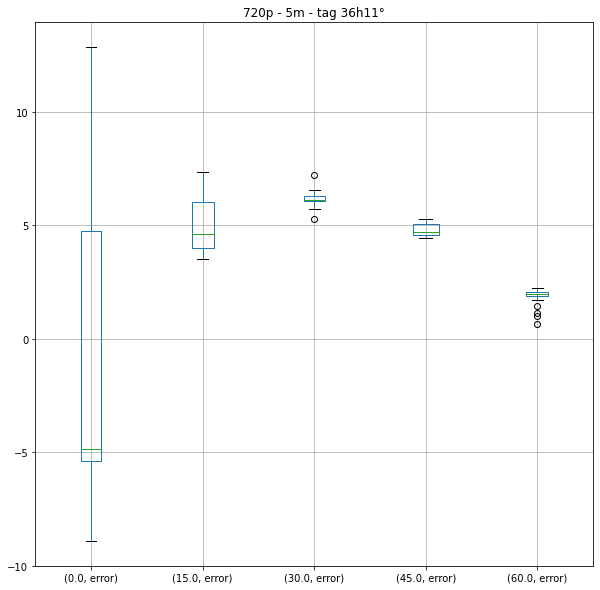

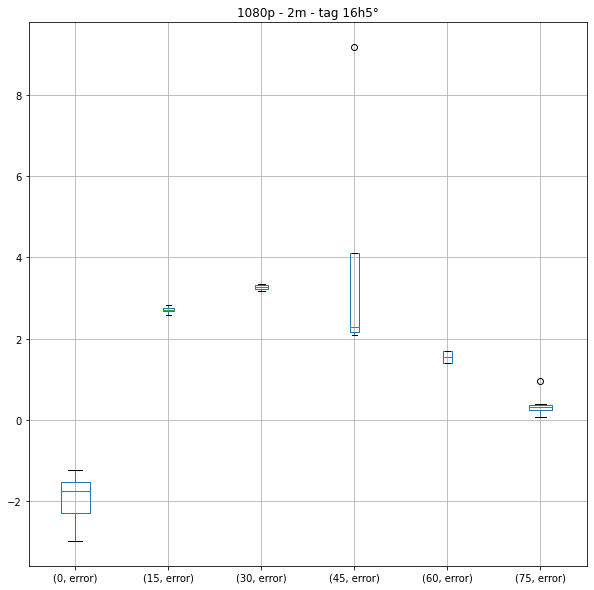

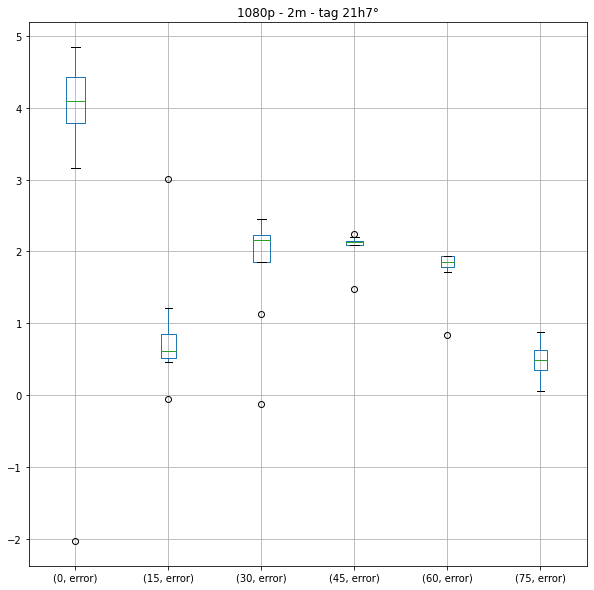

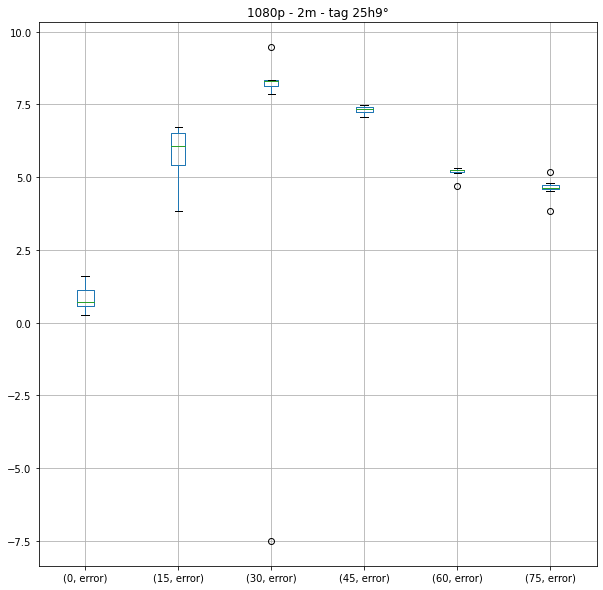

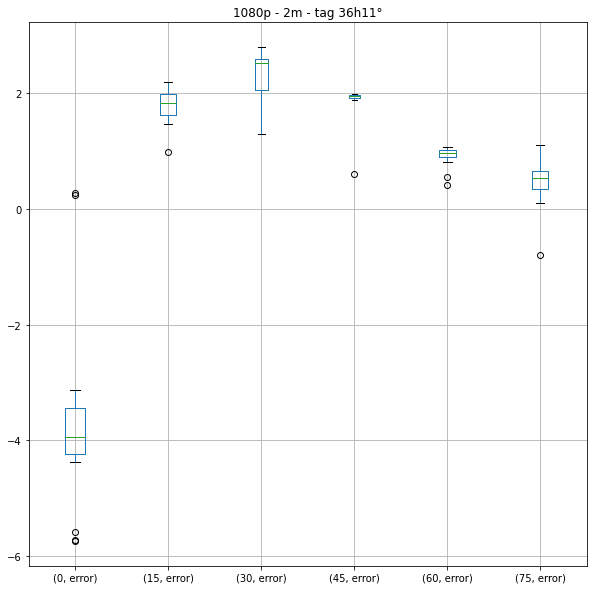

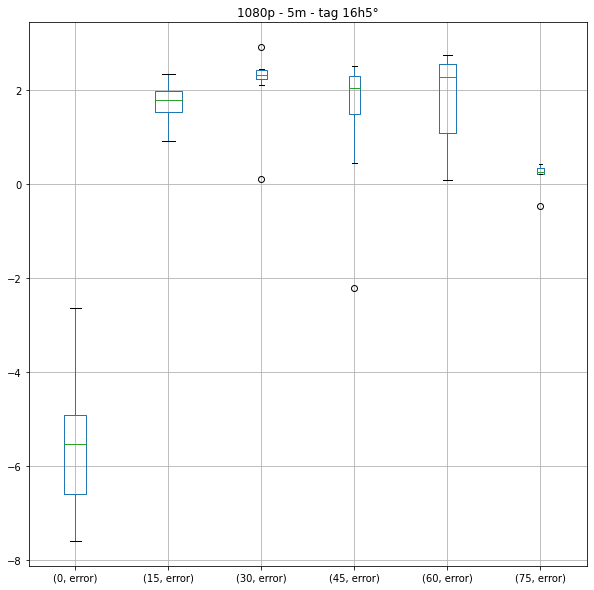

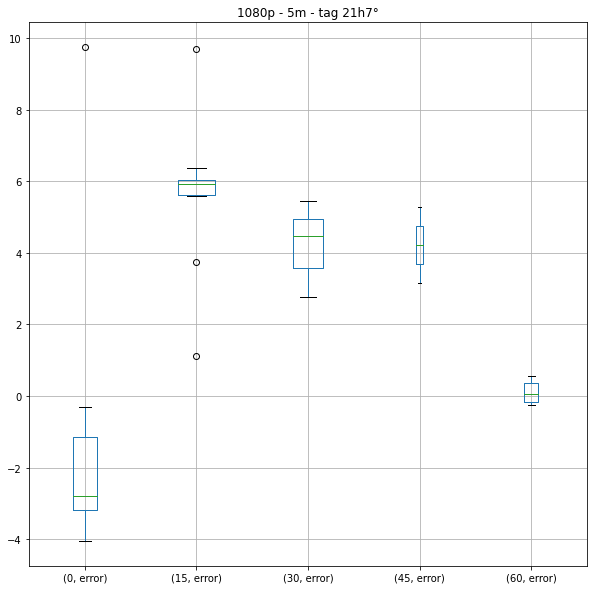

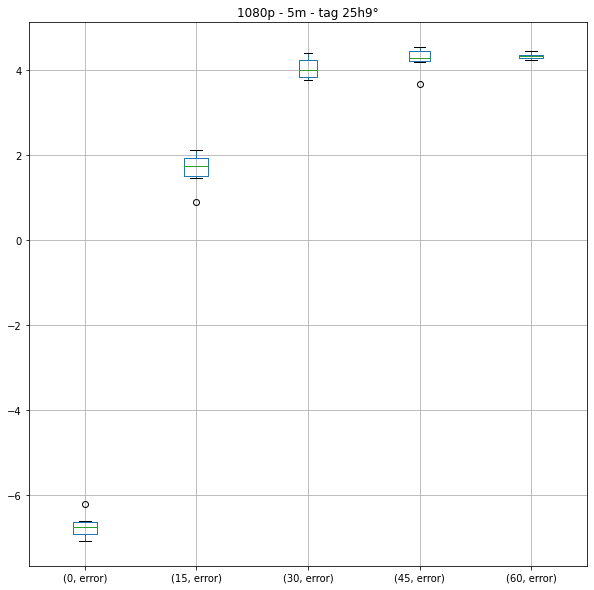

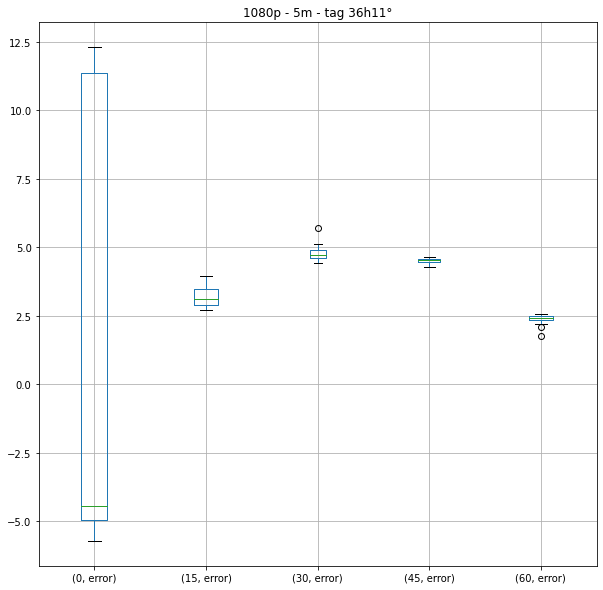

In [57]:
for res in df_groupby_res.keys(): # res
    for distance in sorted(df_groupby_res[res].keys()): # distance
        df = pd.concat(df_groupby_res[res][distance]).reset_index().rename({'level_0': 'tag'}, axis=1).drop(columns=['level_1'], axis=1)
        # print(df.tag.unique())
        for i,tag in enumerate(sorted(df.tag.unique())):
            grouped_df = df.loc[df['tag']==tag].groupby('true_yaw')
            
            width_vals = grouped_df['true_yaw'].count().values

            fig, ax = plt.subplots()
            grouped_df.boxplot(column=['error'], subplots=False, widths=[float(i)/sum(width_vals) for i in width_vals] if (len(width_vals)>1) else None)
            title = '{}p - {} - tag {}°'.format(res, distance, tag)
            ax.set_title(title)
            fig.set_size_inches(10,10)
            plt.show()
           